In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("../DemoFiles/csv/test-527005.csv")
df

,currentTick,playerId,X,Y,Z,deltaX,deltaY,deltaZ,yaw,pitch,...,distToTarget,targetHitArea,penetratedObject,weaponUsed,weaponCategory,isScoping,isTargetBlind,isTargetInSmoke,targetReturnedDmg,Label
0,0.0,7.656120e+16,-1131.01270,743.32117,129.361359,0.000000,0.000000,0.000000,170.337520,-0.285645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1.0,7.656120e+16,-1130.47720,744.08690,129.461693,0.535522,0.765747,0.100334,170.337520,-0.285645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2.0,7.656120e+16,-1129.95600,744.86456,129.560795,0.521118,0.777649,0.099102,170.337520,-0.285645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3.0,7.656120e+16,-1129.44890,745.65370,129.658722,0.507202,0.789124,0.097927,170.337520,-0.285645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4.0,7.656120e+16,-1128.95500,746.45374,129.755516,0.493896,0.800049,0.096794,170.337520,-0.285645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47421,150.0,7.656120e+16,-450.37040,1018.77420,122.031250,0.075378,0.045898,0.000000,121.173706,-0.730591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
47422,151.0,7.656120e+16,-450.21146,1018.87067,122.031250,0.158936,0.096497,0.000000,121.140750,-0.296631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
47423,152.0,7.656120e+16,-450.12790,1018.92126,122.031250,0.083557,0.050598,0.000000,121.107790,0.065918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
47424,153.0,7.656120e+16,-450.04160,1018.97340,122.031250,0.086304,0.052124,0.000000,120.975950,0.626221,...,446.757798,2.0,0.0,weapon_m4a1_silencer,weapon_category_ar,0.0,False,False,0.0,False


## 2) Which body part is targeted [BarChart]

In [15]:
# 0 GENERIC	
# 1 HEAD		
# 2 CHEST		
# 3 STOMACH	
# 4 LEFTARM		
# 5 RIGHTARM	
# 6 LEFTLEG	
# 7 RIGHTLEG	
# 8 GEAR

In [16]:
Unique = np.unique(df["targetHitArea"])

for i in Unique:
    print(i)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
nan


In [17]:
hit_area_mapping = {
    0.0: 'GENERIC',
    1.0: 'HEAD',
    2.0: 'CHEST',
    3.0: 'STOMACH',
    4.0: 'LEFTARM',
    5.0: 'RIGHTARM',
    6.0: 'LEFTLEG',
    7.0: 'RIGHTLEG',
    8.0: 'GEAR',
    'nan': 'NaN'
}

# Map the values in the DataFrame to the corresponding categories
df['targetHitArea'] = df['targetHitArea'].map(hit_area_mapping)

# 2) Target Hit Area Bar Chart 

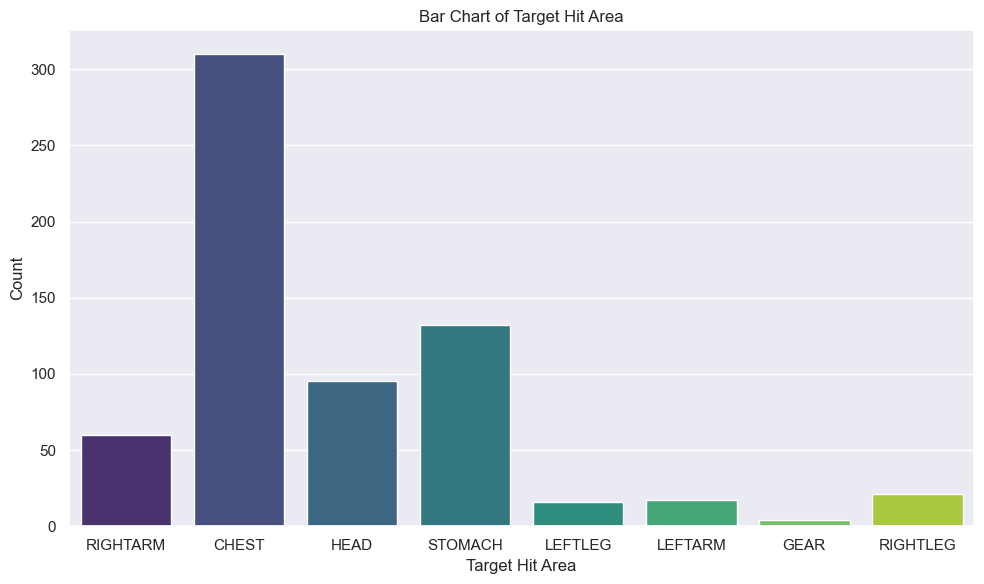

In [18]:
# Set a stylish Seaborn theme
sns.set_theme()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='targetHitArea', data=df, hue='targetHitArea', palette='viridis', dodge=False)
plt.xlabel('Target Hit Area')
plt.ylabel('Count')
plt.title('Bar Chart of Target Hit Area')
plt.tight_layout()  # Adjust layout for better spacing
plt.legend().set_visible(False)  # Hide the legend
plt.show()

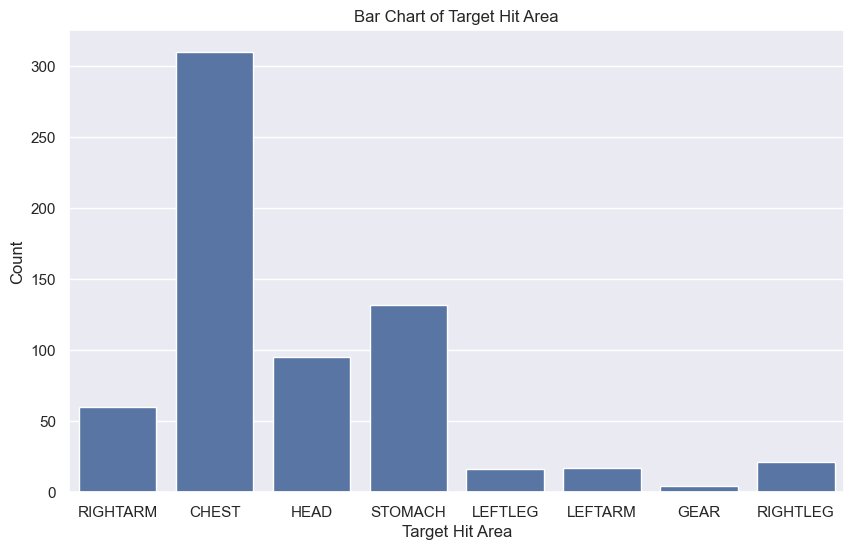

In [19]:
# Without styling

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='targetHitArea', data=df)
plt.xlabel('Target Hit Area')
plt.ylabel('Count')
plt.title('Bar Chart of Target Hit Area')
plt.show()

## 7) Where the players see

In [61]:
columns=df.columns
columns

Index(['currentTick', 'X', 'Y', 'Z', 'velocityX', 'velocityY', 'velocityZ',
       'yaw', 'pitch', 'utilityDmgDone', 'supportUtilityUsed', 'kdr',
       'isCrouched', 'isJumping', 'isFiring', 'targetX', 'targetY', 'targetZ',
       'targetVelocityX', 'targetVelocityY', 'targetVelocityZ', 'tagetYaw',
       'targetPitch', 'dmgDone', 'distToTarget', 'targetHitArea', 'penetrated',
       'weaponUsed', 'targetBlind', 'targetInSmoke', 'targetReturnedDmg',
       'Label'],
      dtype='object')

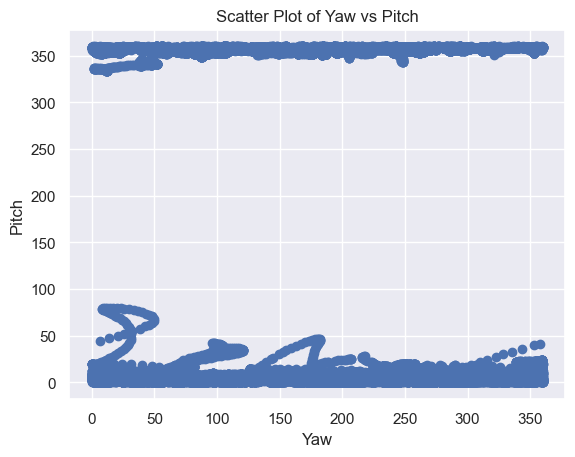

In [62]:
# Assuming your DataFrame is named df
plt.scatter(df['yaw'], df['pitch'])
plt.xlabel('Yaw')
plt.ylabel('Pitch')
plt.title('Scatter Plot of Yaw vs Pitch')
plt.show()